In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(60000, 785)

D:\Softwares\anaconda1\envs\py36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

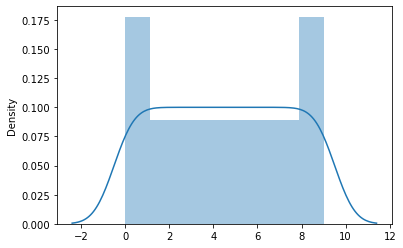

In [6]:
X_train= data.values[:600, 1:]
y_train=data.values[:600, 0]
sns.distplot(y_train)

In [7]:
X_data_valid=pd.read_csv('test.csv')

X_valid = X_data_valid.iloc[:, 1:]
X_valid.shape

(5000, 784)

In [8]:
X_train22= data.values[:, 1:]

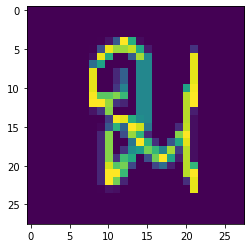

In [9]:
plt.imshow(X_train[125,].reshape(28,28))

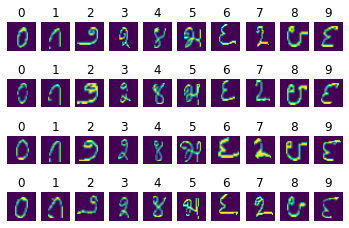

In [10]:
numbers=['0','1','2','3','4','5','6','7','8','9']
rows=4
for m, number in enumerate(numbers):
    
    indx=[i for i, e in enumerate(y_train) if e==m]
    rand_indx=np.random.choice(indx, rows)
    #print(rand_indx)
    for k in range(rows):
        plt.subplot(rows,10,k*10+m+1)
        plt.figsize=(0.2,0.2)
        plt.imshow(X_train[rand_indx[k],].reshape(28,28))
        plt.axis('off')
        plt.title(y_train[rand_indx[k]])

#KNN with sklearn

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
accuracy=[]
for k in range(20):
    knn=KNeighborsClassifier(n_neighbors=k+1)
    knn.fit(X_train,y_train)
    knn_pred=knn.predict(X_test)
    print(accuracy_score(y_test, knn_pred))
    accuracy.append(accuracy_score(y_test, knn_pred))
    

0.9833333333333333
0.975
0.9916666666666667
1.0
0.9833333333333333
0.9666666666666667
0.975
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.95
0.95
0.95
0.95
0.9583333333333334


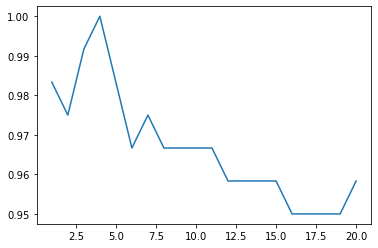

In [14]:
k=range (1,21)
plt.plot(k, accuracy)

In [15]:
k_best=accuracy.index(max(accuracy))+1
k_best


4

In [16]:
knn_best=KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(X_train,y_train)
knn_best_pred_subm=knn_best.predict(X_valid)


# logstic regression ,decision tree, bagging, random forest, adaboost

In [17]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=100, max_depth=5)

from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(n_estimators=100)

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50)

In [18]:
from sklearn.model_selection import cross_val_score
models=[logistic,decisiontree,randomforest,bagging,ada]

In [19]:
for model in models:
    model.fit(X_train, y_train)
    preds=model.predict(X_test)
    print(model)
    print(accuracy_score(preds, y_test))

D:\Softwares\anaconda1\envs\py36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()
0.9666666666666667
DecisionTreeClassifier()
0.8333333333333334
RandomForestClassifier(max_depth=5)
0.9833333333333333
BaggingClassifier(n_estimators=100)
0.9583333333333334
AdaBoostClassifier()
0.18333333333333332


# CNN

D:\Softwares\anaconda1\envs\py36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


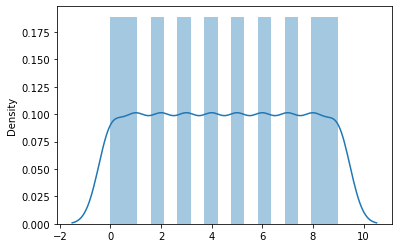

In [20]:
X_train= data.values[:6000, 1:]
y_train=data.values[:6000, 0]
sns.distplot(y_train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD


In [9]:
model=Sequential()


model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='softmax'))
          

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [11]:
model.fit(x=X_train, y=y_train,epochs=15,batch_size=128, validation_data=(X_test,y_test), shuffle=True)

Epoch 1/15
38/38 [==============================] - 3s 66ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/15
38/38 [==============================] - 2s 61ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/15
38/38 [==============================] - 2s 64ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/15
38/38 [==============================] - 2s 65ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/15
38/38 [==============================] - 2s 61ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/15
38/38 [==============================] - 2s 59ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/15
38/38 [==============================] - 2s 53ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/15
38/38 [==============================] - 2s 54ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/15
38/38 [==============================] - 2s 55ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/15
38/38 [==================

In [ ]:
predications= model.predict_classes(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(predications, y_test))

In [ ]:
X_train.shape

In [2]:
import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 不显示等级2以下的提示信息

print('GPU', tf.test.is_gpu_available())

a = tf.constant(2.0)
b = tf.constant(4.0)
print(a + b)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU True
tf.Tensor(0.0, shape=(), dtype=float32)


In [1]:
from platform import python_version

print(python_version())

3.6.10
